In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('11.2 3.12. Example.csv')

In [3]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Plot teh data

Text(0, 0.5, 'Loyalty')

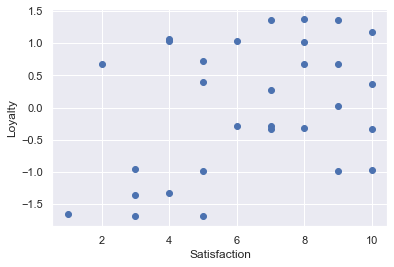

In [4]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel("Satisfaction")
plt.ylabel('Loyalty')

## Select Features!

In [5]:
x = data.copy()

## Clustering 

In [6]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering results

In [7]:
clusters = x.copy()
clusters['clusters_pred'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

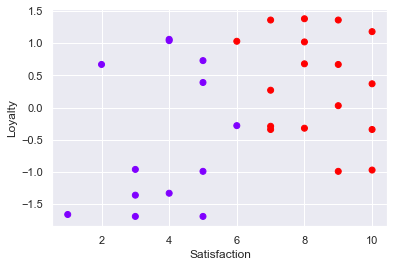

In [8]:
plt.scatter(data['Satisfaction'], data['Loyalty'], c=clusters['clusters_pred'], cmap='rainbow')
plt.xlabel("Satisfaction")
plt.ylabel('Loyalty')

## Standardizing the variables

In [9]:
from sklearn import preprocessing
x_scales = preprocessing.scale(x)

In [10]:
x_scales

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take the advantage of the Eelbow

In [11]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scales)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.326631124753926,
 4.315662464700004,
 3.764528212608572]

Text(0, 0.5, 'Loyalty')

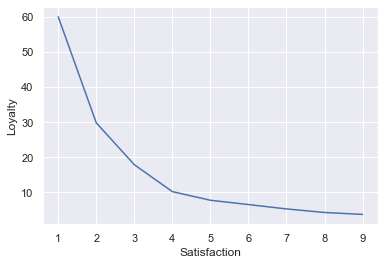

In [14]:
plt.plot(range(1, 10), wcss)
plt.xlabel("Satisfaction")
plt.ylabel('Loyalty')

## Explore clustering solutions and select the numbers of cluster

In [22]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scales)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scales)

In [23]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,3
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,2
9,8,0.68,2


Text(0, 0.5, 'Loyalty')

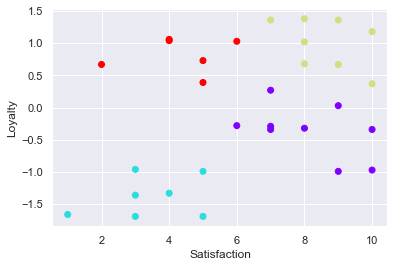

In [24]:
plt.scatter(data['Satisfaction'], data['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel("Satisfaction")
plt.ylabel('Loyalty')